In [7]:
datasetFolder = "data/mix"

In [37]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
import random
import numpy as np
from sklearn.decomposition import PCA
import pandas
import seaborn as sns

from dataUtils import flatInput,getNewDataset,inverseNorm, processPca,\
    showDataplots,simplemethodsresults, pca2Visua, showRandomImages,showMeanstd


%matplotlib inline

In [8]:
flattenDataset, flatTest, fTrainLabels, fTestLabels,dataset = getNewDataset(datasetFolder,seed=1)
nClases = dataset.getNclasses()

Distribution of data 
Train set Counter({1: 60, 0: 28}) test set Counter({1: 36, 0: 19})
Pca with 2 components explained variance [ 0.46923446  0.06876263]
PCA 2 comp of the data (using train)


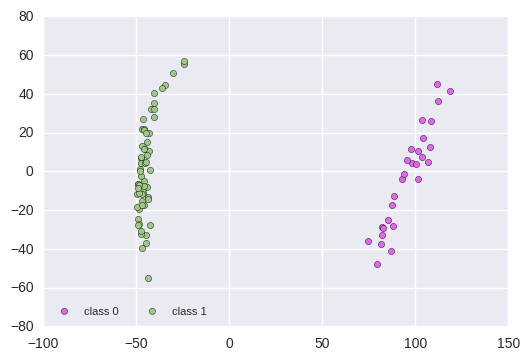

Pca with 2 components explained variance [ 0.46923446  0.06876263]
PCA 2 comp of the data (using train)


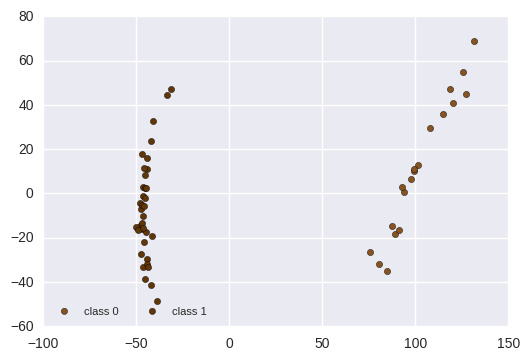

In [11]:
pca = PCA(n_components=2)
pca.fit(flattenDataset)

print "Distribution of data "
print dataset.classDistribution()

pca2Visua(pca,flattenDataset,fTrainLabels,nClases)
pca2Visua(pca,flatTest,fTestLabels,nClases)

Train image  100_1.jpg
Test image  103_1.jpg


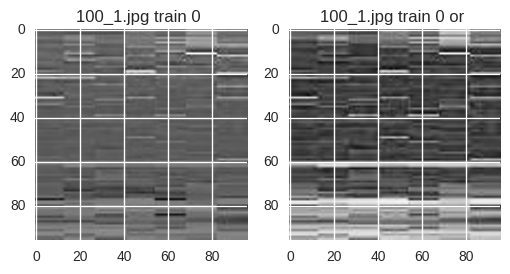

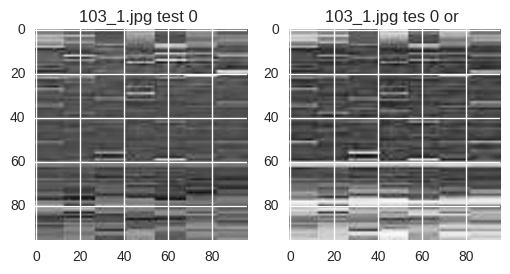

In [12]:
#Show first 1 images train and 1 image test (to show that seed changed)

#------------------TRAIN IAMGE
fname = dataset.getTrainFilename(0)
print "Train image ",fname

imTrain =   flattenDataset[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' train 0 ')
grid[0].imshow(imTrain)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imTrain,dataset)

grid[1].set_title(fname+' train 0 or ')
grid[1].imshow(org)

#------------------TEST IAMGE


fname = dataset.getTestFilename(0)
print "Test image ",fname
imgTest =   flatTest[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' test 0 ')
grid[0].imshow(imgTest)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imgTest,dataset)

grid[1].set_title(fname+' tes 0 or ')
grid[1].imshow(org)

Class  0


Class  1


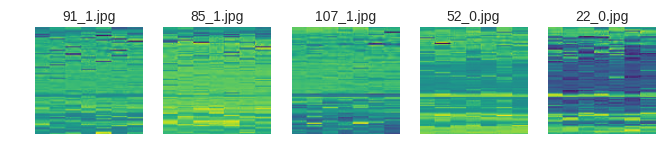

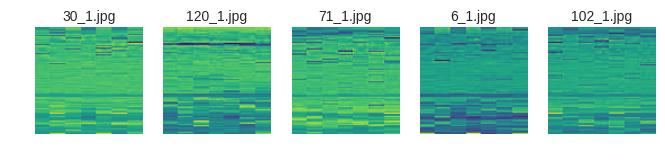

In [34]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showRandomImages(dataset,toShow=5)

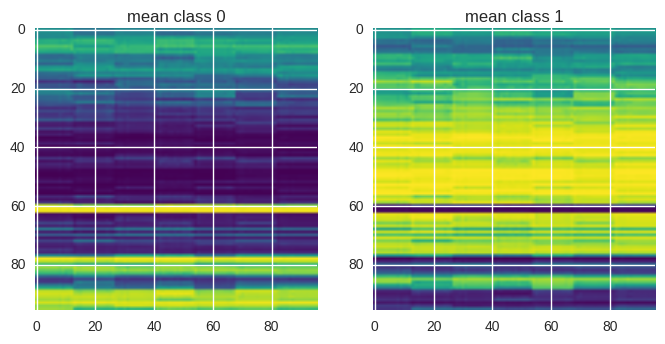

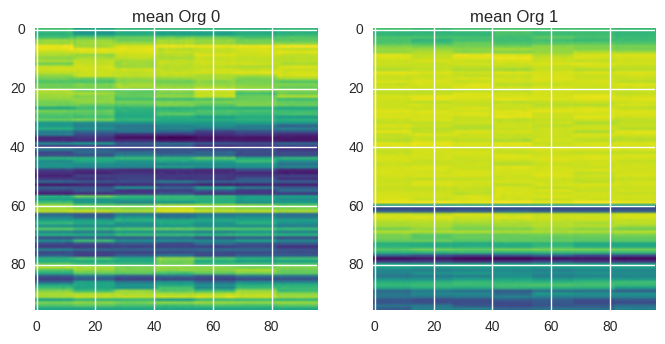

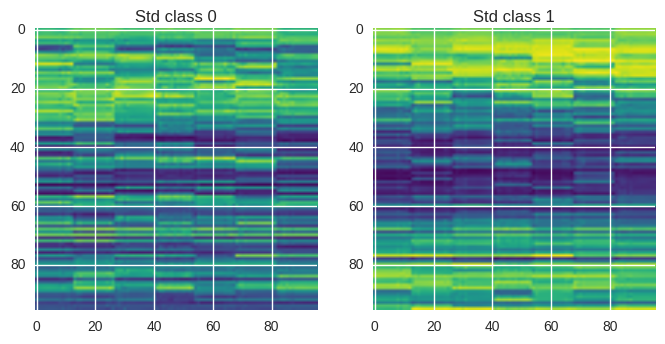

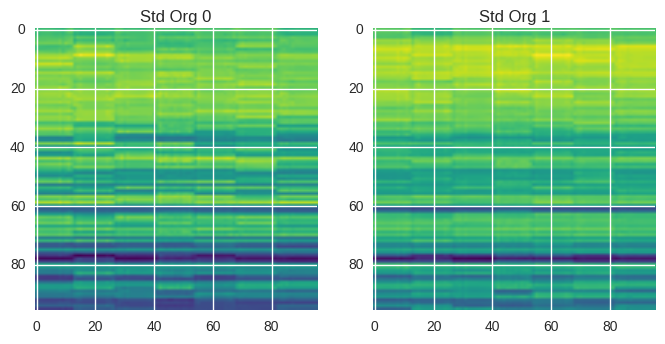

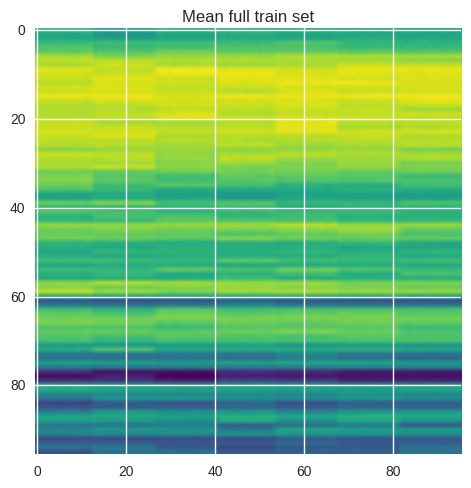

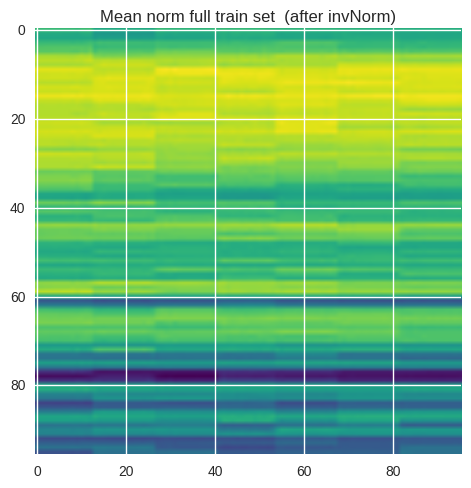

In [38]:
with sns.axes_style("white"):
    sns.set(rc={'image.cmap': "viridis"})
    showMeanstd(dataset)

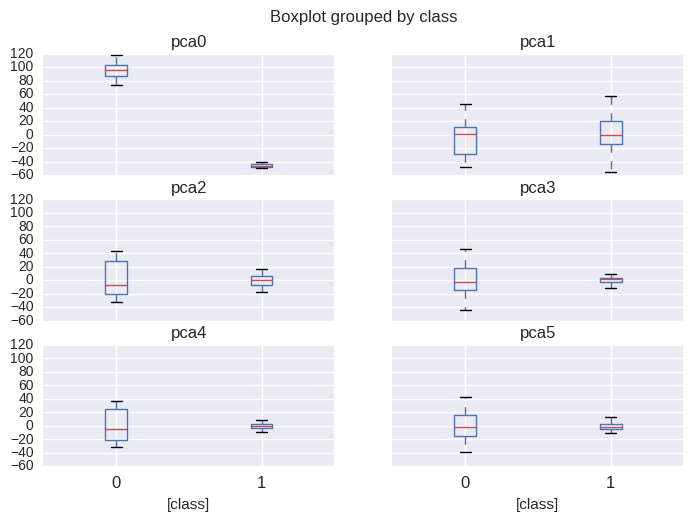

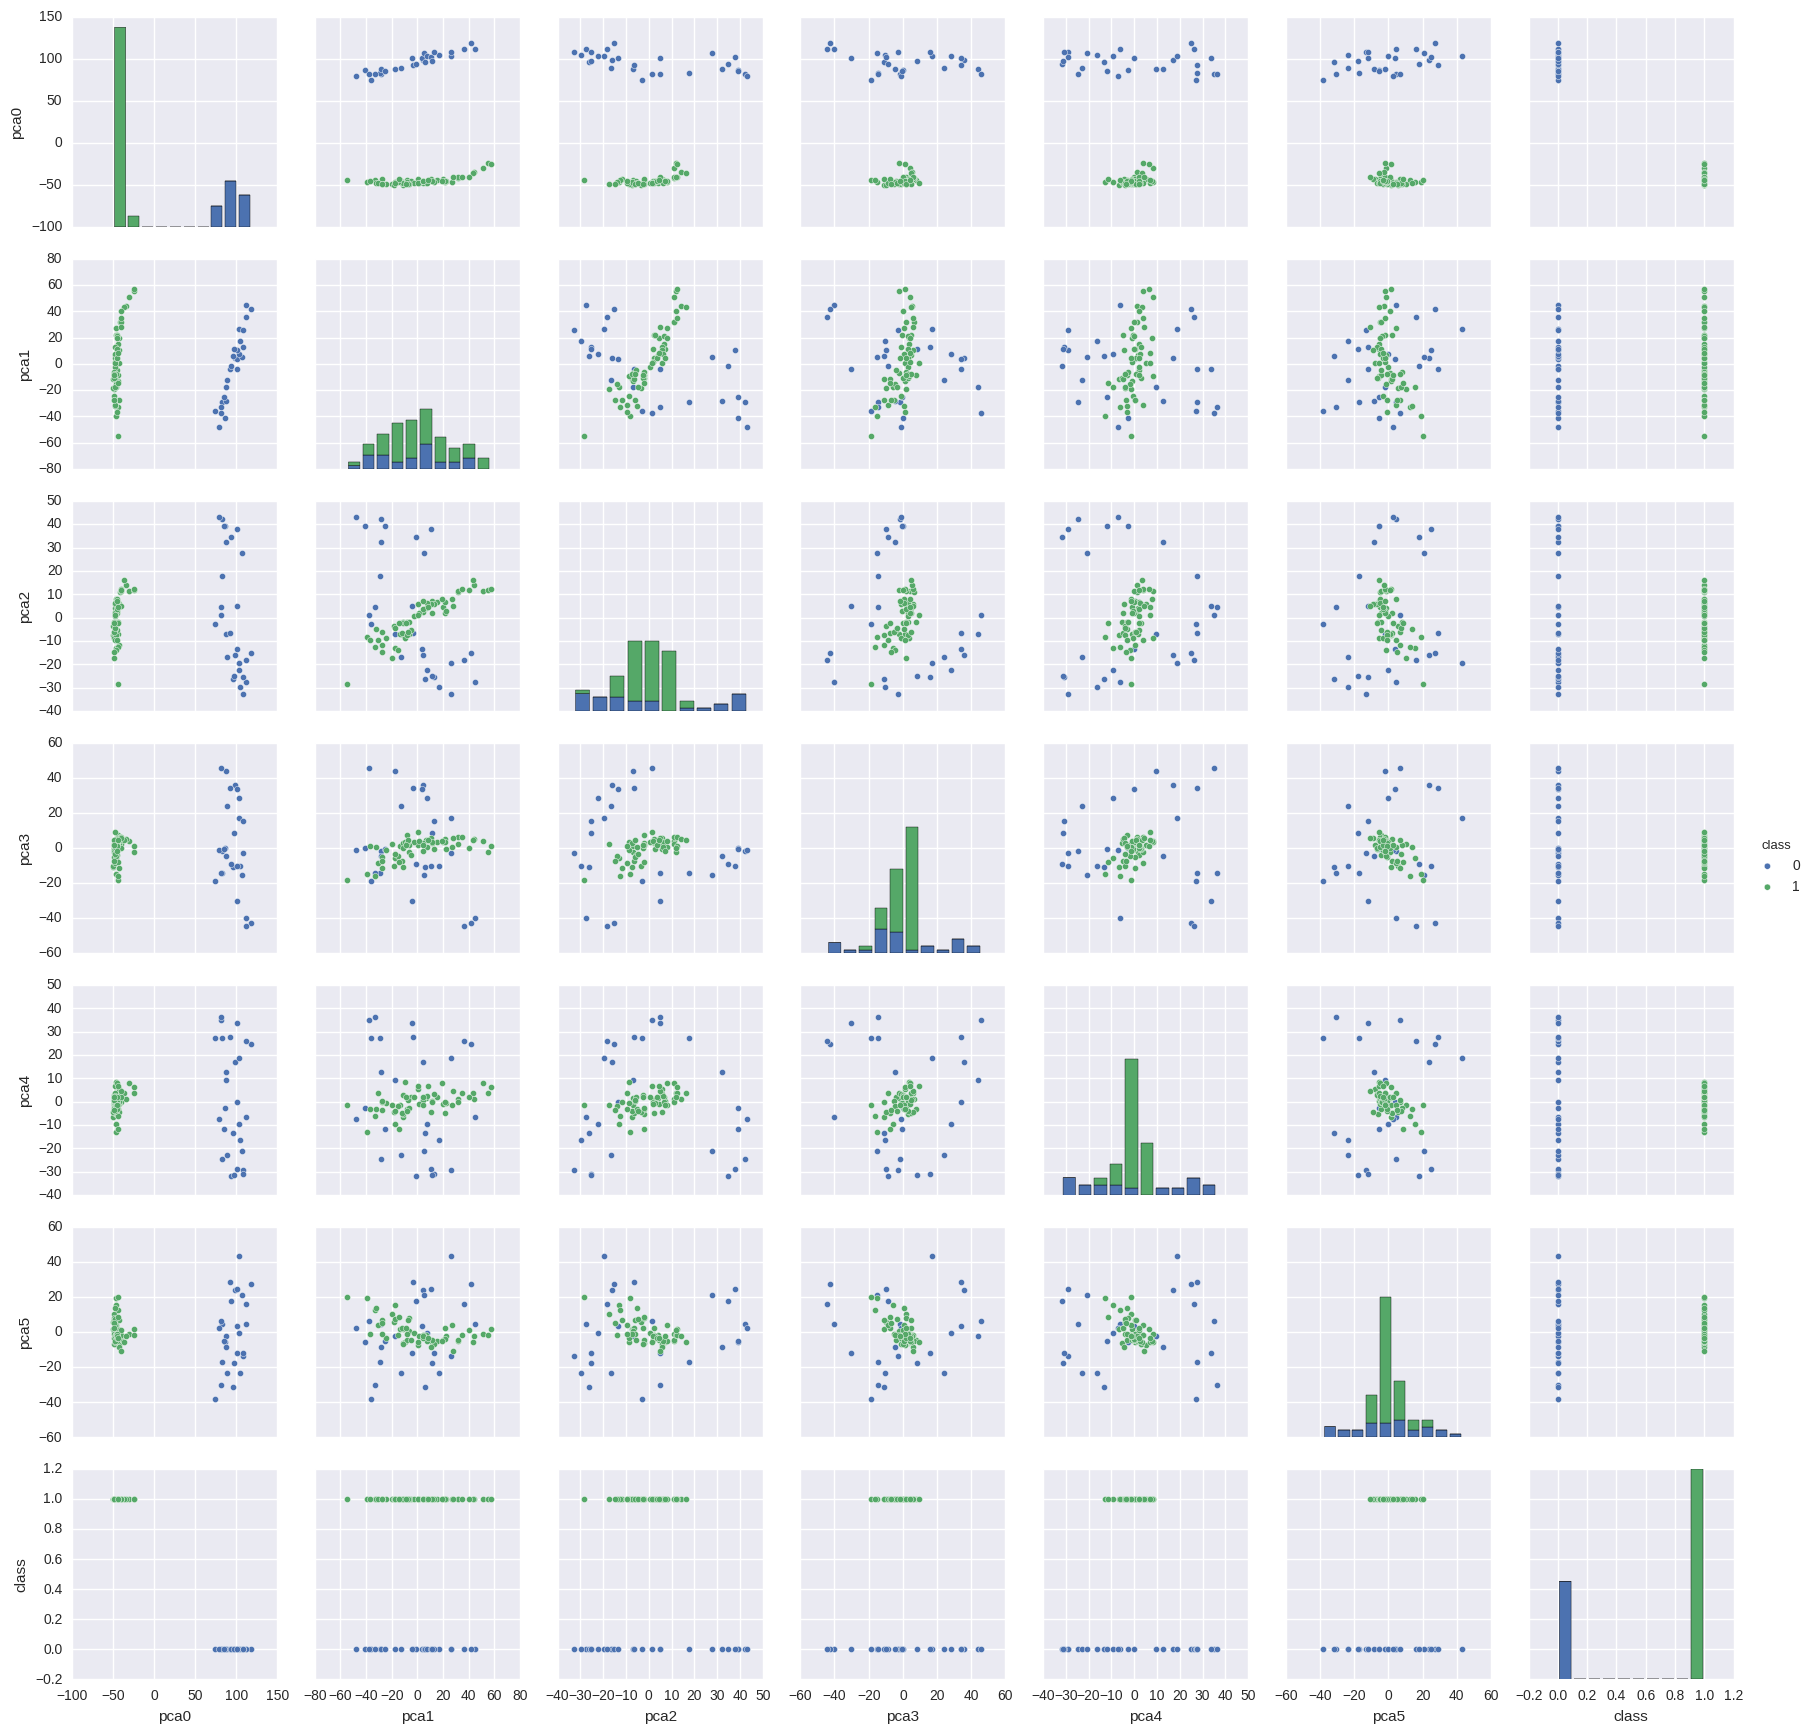

In [39]:
dx,dtestx,ltrain,ltest = processPca(flattenDataset,flatTest,fTrainLabels,fTestLabels)
showDataplots(dx,ltrain)

In [14]:
from sklearn.cluster import MiniBatchKMeans


def processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels):
    # Compute clustering with MiniBatchKMeans.
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, batch_size=100,
                          n_init=10, max_no_improvement=10, verbose=0,
                          random_state=0)
    mbk.fit(flattenDataset)
    
    dataKmTrainX = mbk.transform(flattenDataset)
    dataKmTrainy = fTrainLabels
    
    dataKmTestX = mbk.transform(flatTest)
    dataKmTesty = fTestLabels
    
    return dataKmTrainX,dataKmTestX,dataKmTrainy,dataKmTesty

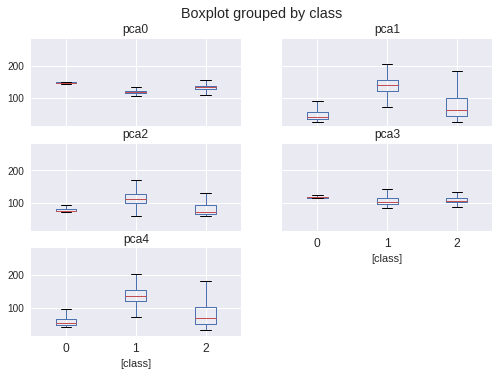

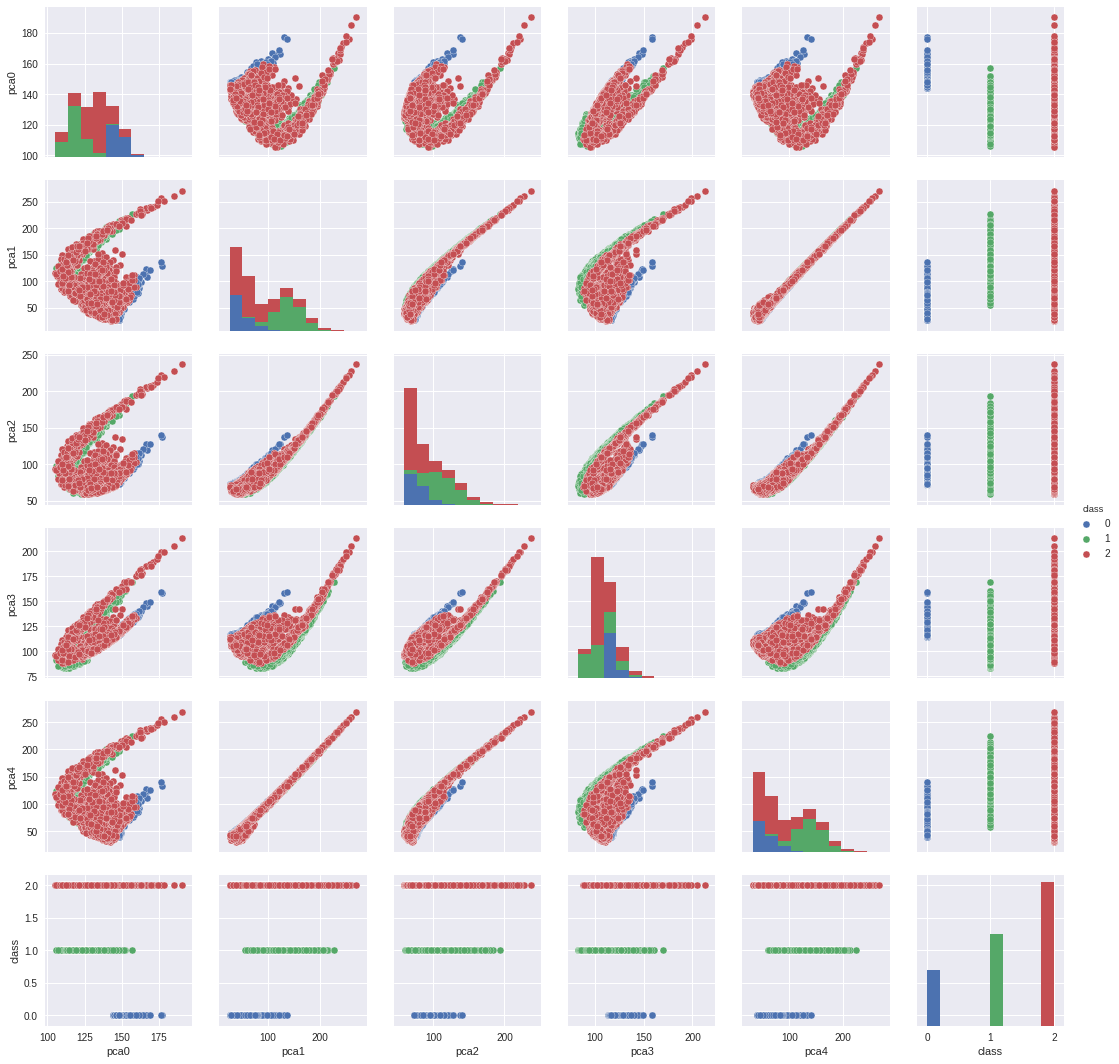

In [15]:
dx,dtestx,ltrain,ltest = processCluster(flattenDataset,flatTest,fTrainLabels,fTestLabels)

showDataplots(dx,ltrain)

In [45]:
print "Results for raw data in models"
#Limited to 500 points because of high dims
transform = lambda x,y,z,w : (x,y,z,w)
simplemethodsresults(datasetFolder,transform,limitPoints=500)

Results for raw data in models


Results: 
MLP accuracy mean  1.0  std  0.0
Linear SVM accuracy mean  0.993939393939  std  0.00857099128711
SVM accuracy mean  1.0  std  0.0


In [46]:
print "Results for cluster data in models"
simplemethodsresults(datasetFolder,processCluster,limitPoints=None)

Results for cluster data in models


NameError: name 'processCluster' is not defined

In [48]:
print "Results for cluster in models"
simplemethodsresults(datasetFolder,processPca,limitPoints=None)

Results for raw data in models


Results: 
MLP accuracy mean  1.0  std  0.0
Linear SVM accuracy mean  1.0  std  0.0
SVM accuracy mean  0.70303030303  std  0.00857099128711
